In [11]:
%pip install matplotlib
%pip install numpy


^C
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0 -> 23.1.2
[notice] To update, run: C:\Users\cleme\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 23.0 -> 23.1.2
[notice] To update, run: C:\Users\cleme\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


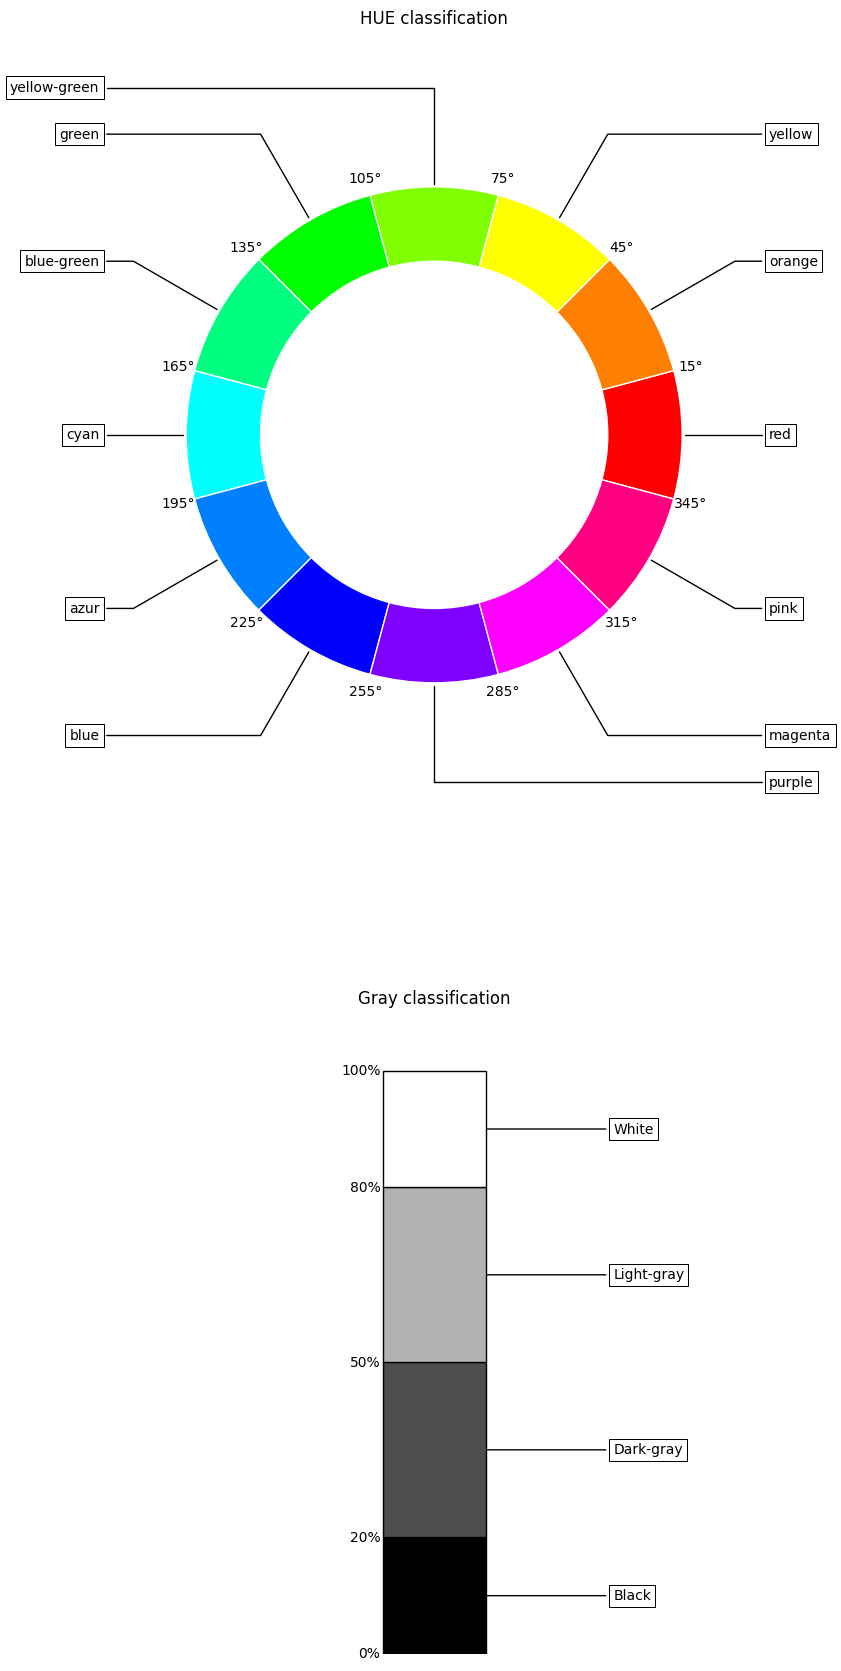

In [12]:
import matplotlib.pyplot as plt
import numpy as np

angles = [15, 45, 75, 105, 135, 165, 195, 225, 255, 285, 315, 345]
couleurs = ["#ff0000", "#ff8000", "#ffff00", "#80ff00", "#00ff00", "#00ff80", "#00ffff", "#007fff", "#0000ff", "#7f00ff", "#ff00ff", "#ff0080", "#ff0000"]
tab = ["red", "orange", "yellow", "yellow-green", "green", "blue-green", "cyan", "azur", "blue", "purple", "magenta", "pink"]

fig, axs = plt.subplots(2, 1, figsize=(8, 20))

# Plot 1: Donut chart
axs[0].set(aspect="equal")

wedgeprops = {"width": 0.3, "edgecolor": "w"}
wedges, texts = axs[0].pie([30] * 12, radius=1, colors=couleurs, wedgeprops=wedgeprops, startangle=-15)
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"), bbox=bbox_props, zorder=0, va="center")
kw["arrowprops"]["linewidth"] = 1
kw["arrowprops"]["color"] = "black"


for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1) / 2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    axs[0].annotate(tab[i], xy=(x, y), xytext=(1.35 * np.sign(x), 1.4 * y), horizontalalignment=horizontalalignment, **kw)
    axs[0].text(x=1.07 * np.cos(np.deg2rad(ang + 15)), y=1.07 * np.sin(np.deg2rad(ang + 15)), s=str(angles[i]) + "°", ha='center', va='center', rotation=0)

axs[0].set_title('HUE classification', y=1.15)


# Plot 2: Bar chart
data = [20, 30, 30, 20]
percents = [0, data[0], sum(data[:2]), sum(data[:3]), sum(data[:4])]
color = ['Black', 'Dark-gray', 'Light-gray', 'White']
colors = ['#000000', '#4d4d4d', '#b2b2b2', '#ffffff']

connectionstyle2 = "arc3,rad=0."
kw["arrowprops"].update({"connectionstyle": connectionstyle2})
c = 0
for i in range(len(data)):
    axs[1].bar(c, data[i], bottom=sum(data[:i]), color=colors[i], width=0.5, edgecolor='black')
    axs[1].annotate(color[i], xy=(c , sum(data[:i]) + data[i] / 2), horizontalalignment="left",xytext=(x, sum(data[:i]) + data[i] / 2), **kw)

axs[1].set_xlim(-1.5, 1.5)
axs[1].set_ylim(0, 110)
axs[1].set_title("Gray classification")




for i in range(len(percents)):
    axs[1].text(x=c - 0.26, y=percents[i], s=str(percents[i]) + "%", ha='right', va='center', rotation=0)

axs[1].axis('off')

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.4)
plt.savefig("./graphe.png")

plt.show() 



C:\Users\cleme\AppData\Local\Temp\ipykernel_6772\2925712971.py:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread('./red.jpg')


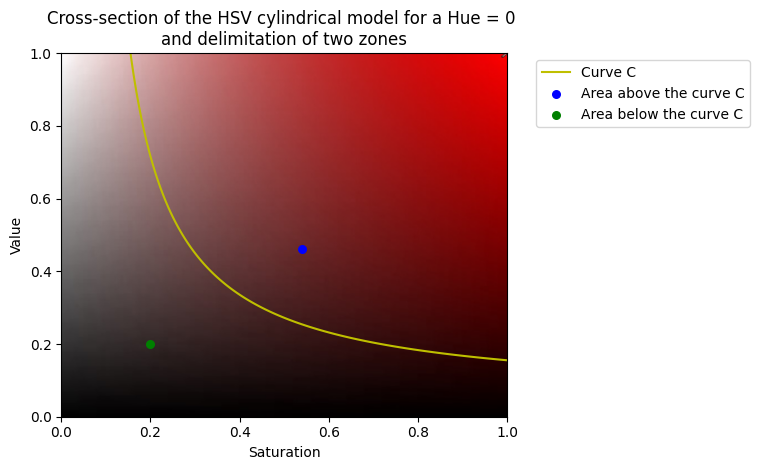

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import imageio

img = imageio.imread('./red.jpg')
x_limit = 1
y_limit = 1
b=0.16

# Generate the X and Y values for the plot(s)
x = np.linspace(0.1, x_limit, 1000)
x2 = np.linspace(b,x_limit, 1000)
y = np.linspace(0, y_limit, 1000)

y3 = np.linspace(b, y_limit, 1000)

# Create the mesh grid(s) for all X/Y combos.
X, Y = np.meshgrid(x, y)
X2, Y = np.meshgrid(x2, y)
X,Y3 = np.meshgrid(x, y3)
a=1.2
# Define the function
W = X**2 + (Y-1)**2 - 0.04
def Curve(y, x):
    n = 0.05
    return (y - (0.1 / (x - n)) - n)

D = Curve(Y, X)
D2= Y-b
D3=X-b


'''
plt.contour(X2, Y, D2, [0], colors='b')
plt.contour(X, Y3, D3, [0], colors='b')
'''
plt.contour(X, Y, D, [0], colors='y' )

plt.imshow(img, extent=[0, x_limit, 0, y_limit], aspect='auto')

# Define the plot limits
plt.xlim([0, x_limit])
plt.ylim([0, y_limit])

# Display the plot
plt.grid(False)
plt.title('Cross-section of the HSV cylindrical model for a Hue = 0 \nand delimitation of two zones')
plt.xlabel('Saturation')
plt.ylabel('Value')


n = 0.05

plt.tight_layout()  
plt.subplots_adjust(right=0.8)  

plt.plot([], [], 'y', label='Curve C')

plt.scatter(0.54, 0.46, color='b', s=30, label='Area above the curve C')
plt.scatter(0.2, 0.2, color='g', s=30, label='Area below the curve C') 
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('figure.png', bbox_inches='tight')  


plt.show()
